In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/wikitext-2/wikitext-2/wiki.train.tokens', 'r') as file:
    content = file.readlines()

In [ ]:
content

[' \n',
 ' = Valkyria Chronicles III = \n',
 ' \n',
 ' Senjō no Valkyria 3 : <unk> Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . <unk> the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " <unk> Raven " . \n',
 " The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more <unk> f

In [63]:
article_names = []
article_index = []
for index, text in enumerate(content):
  if len(text) < 5:
    continue
  if (text[1] == '=') and (text[3] != '='):
    article_names.append(text)
    article_index.append(index)
article_index.append(len(content)-1)

In [64]:
article_names[:10]

[' = Valkyria Chronicles III = \n',
 ' = Tower Building of the Little Rock Arsenal = \n',
 ' = <unk> Mary Barker = \n',
 " = Gambia women 's national football team = \n",
 ' = Plain maskray = \n',
 ' = 2011 – 12 Columbus Blue Jackets season = \n',
 ' = <unk> ; <unk> = \n',
 ' = Goals ; A = \n',
 ' = Points ; <unk> = \n',
 ' = Games Played ; <unk> = \n']

In [65]:
#number of articles
len(articles)

629

In [66]:
article_index[:10]

[1, 51, 133, 271, 287, 316, 378, 380, 382, 388]

In [67]:
temp_article = ''
article_content = []
for i in range(len(article_index)-1):
  for j in range(article_index[i] + 1, article_index[i+1]):
    temp_article += content[j]
  article_content.append(temp_article)
  temp_article = ''

In [68]:
len(article_content)

629

In [69]:
article_content[628]

' \n The common starling ( Sturnus vulgaris ) , also known as the European starling , or in the British Isles just the starling , is a medium @-@ sized <unk> bird in the starling family , Sturnidae . It is about 20 cm ( 8 in ) long and has glossy black plumage with a metallic <unk> , which is speckled with white at some times of year . The legs are pink and the bill is black in winter and yellow in summer ; young birds have <unk> plumage than the adults . It is a noisy bird , especially in communal roosts and other gregarious situations , with an <unk> but varied song . Its gift for mimicry has been noted in literature including the <unk> and the works of Pliny the Elder and William Shakespeare . \n The common starling has about a dozen subspecies breeding in open habitats across its native range in temperate Europe and western Asia , and it has been introduced to Australia , New Zealand , Canada , United States , Mexico , Peru , Argentina , the Falkland Islands , Brazil , Chile , Urug

In [70]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [71]:
def get_word_count(text):
    words = word_tokenize(text)
    word_count = len(words)

    return word_count

In [73]:
article_word_counts = []
for text in article_content:
  article_length = get_word_count(text)
  article_word_counts.append(article_length)

In [75]:
len(article_word_counts)

629

In [76]:
article_summ_dict = dict(zip(article_names, article_word_counts))

In [77]:
article_summ_dict

{' = Valkyria Chronicles III = \n': 4082,
 ' = Tower Building of the Little Rock Arsenal = \n': 4173,
 ' = <unk> Mary Barker = \n': 3282,
 " = Gambia women 's national football team = \n": 723,
 ' = Plain maskray = \n': 1421,
 ' = 2011 – 12 Columbus Blue Jackets season = \n': 3632,
 ' = <unk> ; <unk> = \n': 5,
 ' = Goals ; A = \n': 5,
 ' = Points ; <unk> = \n': 26,
 ' = Games Played ; <unk> = \n': 8,
 ' = Wins ; L = \n': 5,
 ' = <unk> Losses ; GA = \n': 21,
 ' = <unk> ; Sv % = \n': 546,
 ' = Gregorian Tower = \n': 1762,
 " = There 's Got to Be a Way = \n": 1054,
 ' = Nebraska Highway 88 = \n': 692,
 ' = USS Atlanta ( 1861 ) = \n': 3191,
 ' = Jacqueline Fernandez = \n': 3096,
 ' = John Cullen = \n': 2445,
 ' = SMS Erzherzog Ferdinand Max = \n': 1309,
 ' = Ancient Egyptian deities = \n': 10835,
 ' = South of Heaven = \n': 2774,
 ' = General aviation in the United Kingdom = \n': 6947,
 ' = SMS Zrínyi = \n': 2311,
 ' = Geopyxis carbonaria = \n': 1561,
 ' = Gold dollar = \n': 5125,
 ' = Joh

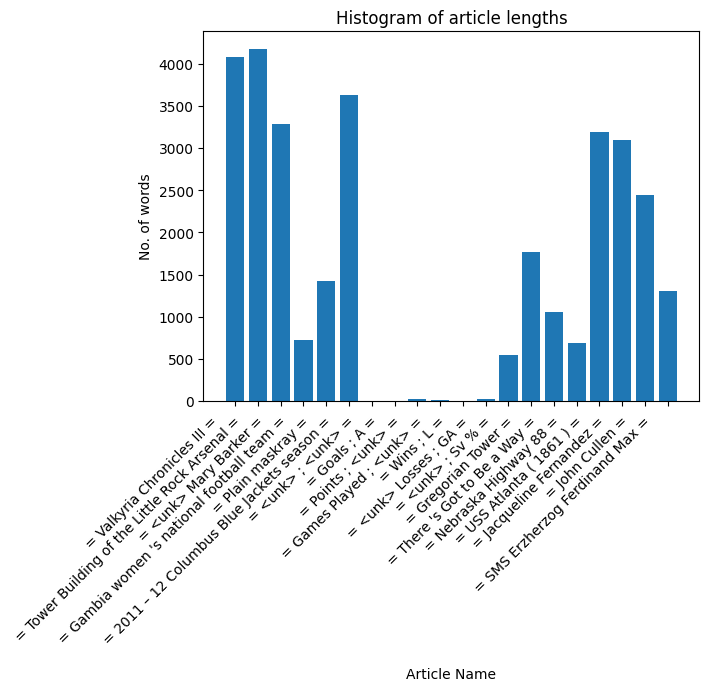

In [81]:
import matplotlib.pyplot as plt

top_20_data = dict(list(article_summ_dict.items())[:20])
plt.bar(top_20_data.keys(), top_20_data.values())

plt.xlabel('Article Name')
plt.ylabel('No. of words')
plt.title('Histogram of article lengths')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [82]:
total_words = 0
for text in content:
  count = get_word_count(text)
  total_words += count

In [83]:
#total no. of tokens
total_words

2207913

In [85]:
def get_unique_word_count(text):
    words = word_tokenize(text)
    word_count = len(set(words))

    return word_count

In [86]:
total_unique_words = 0
for text in content:
  count = get_unique_word_count(text)
  total_unique_words += count

In [87]:
#no. of unique words
total_unique_words

1282349